# Assignment 9 & 10: Charts
#### Joshua Greenert
#### DSC640-T301 Data Presentation and Visualization
#### 2/6/2023

In [1]:
# Import the required libaries for plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the datasets.
df_ppg = pd.read_csv('ppg2008.csv')
df_costcos = pd.read_csv('costcos-geocoded.csv')

# Show the data.
df_ppg.head(5)

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [2]:
# Set a new dataframe without string names.
df_no_name = df_ppg

# Remove the name column
df_no_name = df_no_name.drop(['Name  '], axis = 1)

<AxesSubplot:title={'center':'Python Heat Map'}>

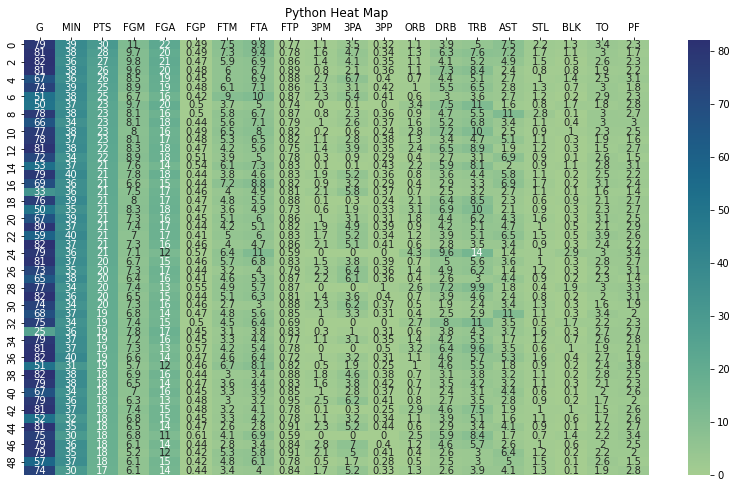

In [3]:
# Create the heat map.
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
axes.set_title('Python Heat Map')
axes.xaxis.tick_top()
sns.heatmap(df_no_name, annot=True, cmap="crest")

In [4]:
# Use the data from costcos
df_costcos.head(5)

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [5]:
# Create a spatial chart 
import geopandas as gpd
from shapely.geometry import Point

# Create a geometry column 
df_costcos['geometry'] = [Point(xy) for xy in zip(df_costcos.Longitude, df_costcos.Latitude)]

# Convert the dataframe to geoframe. 
gdf = gpd.GeoDataFrame(df_costcos, crs='epsg:4326', geometry='geometry')

gdf.head(5)

,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (-134.48300 58.35920)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (-149.88422 61.14327)


AttributeError: module 'plotly' has no attribute 'scatter_geo'

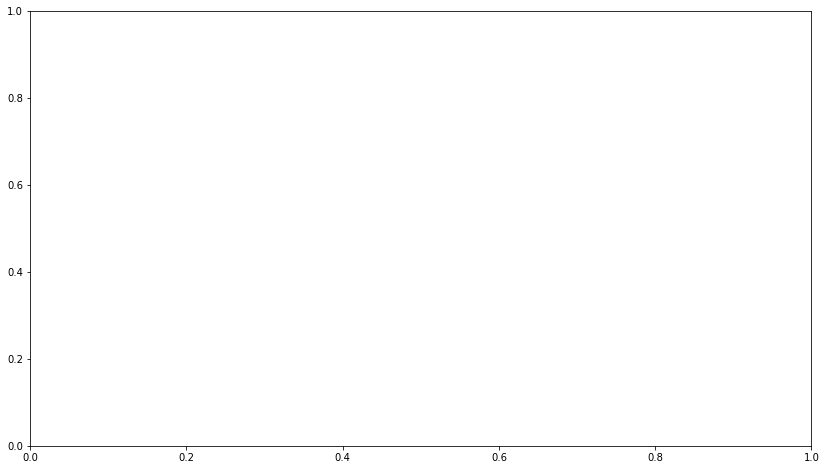

In [7]:
# Plot the chart.
import plotly as px

fig, ax= plt.subplots(1, 1, figsize=(14, 8))

# Creating Spatial map using Plotly
fig = px.scatter_geo(costco_df,lat='Latitude',lon='Longitude', hover_name="State", scope="usa", color='State')
fig.update_layout(title = 'Python Spatial Chart', title_x=0.5, title_y=0.89)
fig.show()

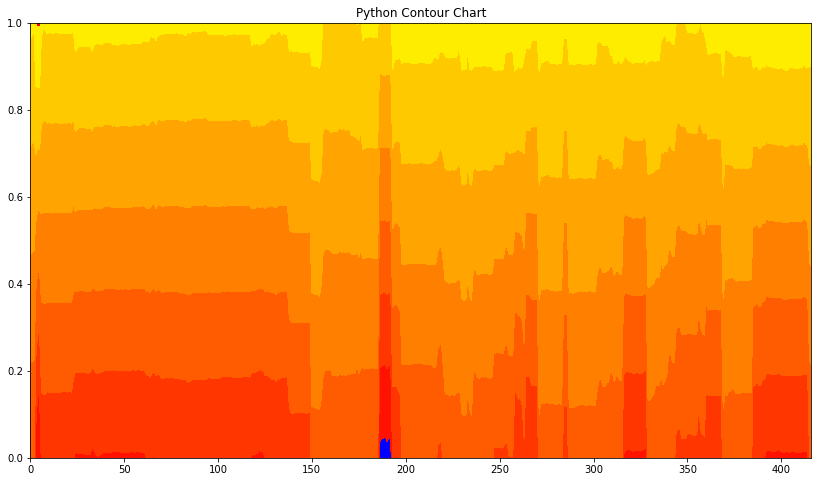

In [56]:
# Create a contour chart
import matplotlib as mpl

# Set the cmap object to avoid deprectation warnings.
cmap = mpl.cm.get_cmap("autumn").copy()

fig, ax= plt.subplots(1, 1, figsize=(14, 8))
cs = plt.contourf([df_costcos['Longitude'],df_costcos['Latitude']], cmap=cmap, extend='both')
ax.axes.set_title('Python Contour Chart')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()